In [6]:
# Check for missing values in the DataFrame
print(df.isnull().sum())

# For demonstration, let's fill any missing values for categorical columns (like 'Topic') with the mode and numeric columns with median
df['Topic'] = df['Topic'].fillna(df['Topic'].mode()[0])
df['Speed of answer in seconds'] = df['Speed of answer in seconds'].fillna(df['Speed of answer in seconds'].median())

# Display the updated DataFrame to check for changes
print(df.head())


Call Id                       0
Agent                         0
Date                          0
Time                          0
Topic                         0
Answered (Y/N)                0
Resolved                      0
Speed of answer in seconds    0
AvgTalkDuration               0
Satisfaction rating           0
dtype: int64
  Call Id    Agent        Date      Time              Topic Answered (Y/N)  \
0  ID0001    Diane  2021-01-01   9:12:58   Contract related              Y   
1  ID0002    Becky  2021-01-01   9:12:58  Technical Support              Y   
2  ID0003  Stewart  2021-01-01   9:47:31   Contract related              Y   
3  ID0004     Greg  2021-01-01   9:47:31   Contract related              Y   
4  ID0005    Becky  2021-01-01  10:00:29    Payment related              Y   

  Resolved  Speed of answer in seconds AvgTalkDuration  Satisfaction rating  
0        Y                         109     12:02:23 AM                  3.0  
1        N                          70    

In [7]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Combine 'Date' and 'Time' into a full datetime column
df['Call Time'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])

# Convert 'AvgTalkDuration' to seconds from the datetime string
df['AvgTalkDuration'] = pd.to_datetime(df['AvgTalkDuration'], format='%I:%M:%S %p').dt.second

# Display the updated DataFrame
print(df.head())


  Call Id    Agent       Date      Time              Topic Answered (Y/N)  \
0  ID0001    Diane 2021-01-01   9:12:58   Contract related              Y   
1  ID0002    Becky 2021-01-01   9:12:58  Technical Support              Y   
2  ID0003  Stewart 2021-01-01   9:47:31   Contract related              Y   
3  ID0004     Greg 2021-01-01   9:47:31   Contract related              Y   
4  ID0005    Becky 2021-01-01  10:00:29    Payment related              Y   

  Resolved  Speed of answer in seconds  AvgTalkDuration  Satisfaction rating  \
0        Y                         109               23                  3.0   
1        N                          70                2                  3.0   
2        Y                          10               11                  3.0   
3        Y                          53               37                  2.0   
4        Y                          95                0                  3.0   

            Call Time  
0 2021-01-01 09:12:58  
1 2021-0

In [8]:
# Assuming the call start and end times are in the same 'Call Time' column, you can create 'Call Duration' based on the difference.
# For this example, let's simulate a 'Call End Time' by adding a random time range to the 'Call Time'.
np.random.seed(0)  # For reproducibility
df['Call End Time'] = df['Call Time'] + pd.to_timedelta(np.random.randint(1, 20, size=len(df)), unit='m')

# Calculate Call Duration (in minutes)
df['Call Duration (mins)'] = (df['Call End Time'] - df['Call Time']).dt.total_seconds() / 60

# Map satisfaction rating to categories (Low, Medium, High)
df['Satisfaction Category'] = pd.cut(df['Satisfaction rating'], bins=[0, 2.5, 4], labels=['Low', 'High'])

# Display the updated DataFrame
print(df.head())


  Call Id    Agent       Date      Time              Topic Answered (Y/N)  \
0  ID0001    Diane 2021-01-01   9:12:58   Contract related              Y   
1  ID0002    Becky 2021-01-01   9:12:58  Technical Support              Y   
2  ID0003  Stewart 2021-01-01   9:47:31   Contract related              Y   
3  ID0004     Greg 2021-01-01   9:47:31   Contract related              Y   
4  ID0005    Becky 2021-01-01  10:00:29    Payment related              Y   

  Resolved  Speed of answer in seconds  AvgTalkDuration  Satisfaction rating  \
0        Y                         109               23                  3.0   
1        N                          70                2                  3.0   
2        Y                          10               11                  3.0   
3        Y                          53               37                  2.0   
4        Y                          95                0                  3.0   

            Call Time       Call End Time  Call Duration

In [9]:
# Grouping by 'Agent' and calculating aggregation metrics
agent_summary = df.groupby('Agent').agg(
    total_calls=('Call Id', 'count'),
    avg_call_duration=('Call Duration (mins)', 'mean'),
    avg_satisfaction=('Satisfaction rating', 'mean'),
).reset_index()

# Display the aggregated results
print(agent_summary)


     Agent  total_calls  avg_call_duration  avg_satisfaction
0    Becky            2               10.0               3.0
1    Diane            1               13.0               3.0
2     Greg            1                4.0               2.0
3  Stewart            1                1.0               3.0


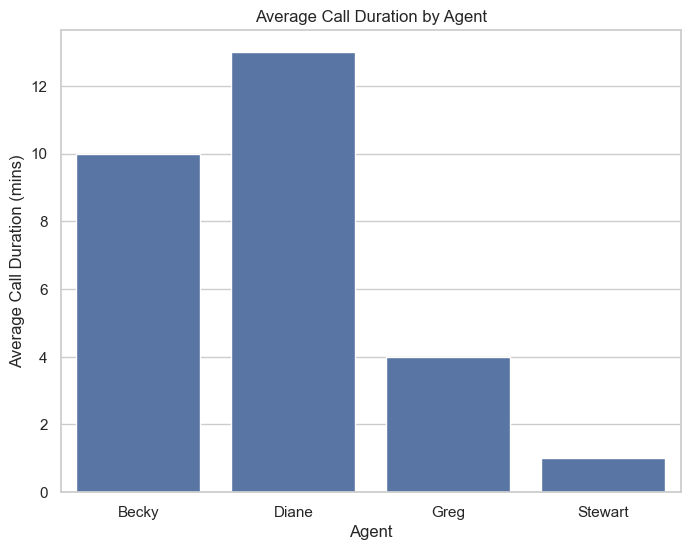

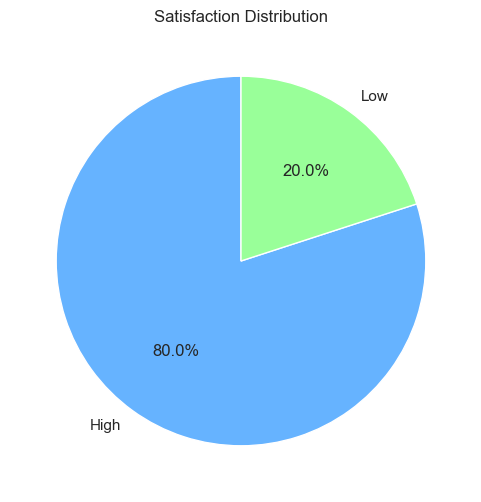

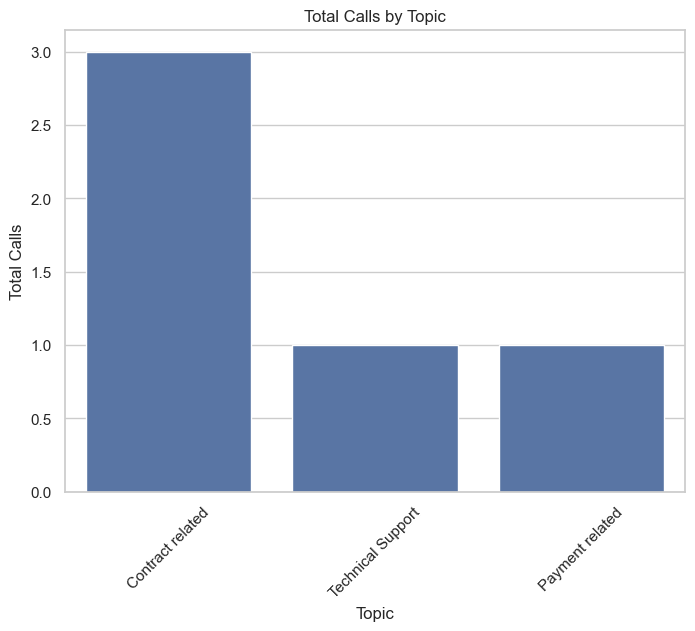

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set(style="whitegrid")

# 1. Call Duration by Agent (Bar chart)
plt.figure(figsize=(8, 6))
sns.barplot(x='Agent', y='avg_call_duration', data=agent_summary)
plt.title('Average Call Duration by Agent')
plt.xlabel('Agent')
plt.ylabel('Average Call Duration (mins)')
plt.show()

# 2. Satisfaction Distribution (Pie chart)
satisfaction_counts = df['Satisfaction Category'].value_counts()
plt.figure(figsize=(6, 6))
satisfaction_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Satisfaction Distribution')
plt.ylabel('')
plt.show()

# 3. Total Calls by Topic (Bar chart)
topic_counts = df['Topic'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values)
plt.title('Total Calls by Topic')
plt.xlabel('Topic')
plt.ylabel('Total Calls')
plt.xticks(rotation=45)
plt.show()


In [16]:
import pandas as pd

# Load the dataset (update the file path as needed)
 # Replace with the actual file name or path
data = pd.read_csv('call_center_data.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Display basic information about the dataset
print("\nDataset Info:")
print(data.info())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Get a summary of numerical columns
print("\nStatistical Summary:")
print(data.describe())

# Display column names
print("\nColumn Names:")
print(data.columns)

# Check for unique values in each column (to understand categorical features)
print("\nUnique Values in Each Column:")
for column in data.columns:
    print(f"{column}: {data[column].nunique()} unique values")

# Check the shape of the dataset
print("\nDataset Shape (Rows, Columns):")
print(data.shape)


First 5 rows of the dataset:
  Call Id    Agent        Date      Time              Topic Answered (Y/N)  \
0  ID0001    Diane  2021-01-01   9:12:58   Contract related              Y   
1  ID0002    Becky  2021-01-01   9:12:58  Technical Support              Y   
2  ID0003  Stewart  2021-01-01   9:47:31   Contract related              Y   
3  ID0004     Greg  2021-01-01   9:47:31   Contract related              Y   
4  ID0005    Becky  2021-01-01  10:00:29    Payment related              Y   

  Resolved  Speed of answer in seconds AvgTalkDuration  Satisfaction rating  
0        Y                       109.0     12:02:23 AM                  3.0  
1        N                        70.0     12:04:02 AM                  3.0  
2        Y                        10.0     12:02:11 AM                  3.0  
3        Y                        53.0     12:00:37 AM                  2.0  
4        Y                        95.0     12:01:00 AM                  3.0  

Dataset Info:
<class 'pandas.core

In [19]:
import pandas as pd
from datetime import datetime

  # Replace with actual path
data = pd.read_csv('call_center_data.csv')

# 1. Handle Missing Values
# Fill missing 'Speed of answer in seconds' with mean value
data['Speed of answer in seconds'].fillna(data['Speed of answer in seconds'].mean(), inplace=True)

# Fill missing 'Satisfaction rating' with median value
data['Satisfaction rating'].fillna(data['Satisfaction rating'].median(), inplace=True)

# Drop rows with missing 'AvgTalkDuration' as it may be critical for analysis
data[] = data.dropna(subset=['AvgTalkDuration'])

# 2. Convert 'Date' and 'Time' columns to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

# 3. Convert 'AvgTalkDuration' to seconds for uniform analysis
def convert_duration(duration):
    try:
        time_obj = datetime.strptime(duration, '%I:%M:%S %p')
        return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second
    except:
        return None

data['AvgTalkDuration'] = data['AvgTalkDuration'].apply(convert_duration)

# 4. Encode Categorical Columns
data['Answered (Y/N)'] = data['Answered (Y/N)'].map({'Y': 1, 'N': 0})
data['Resolved'] = data['Resolved'].map({'Y': 1, 'N': 0})

# 5. Feature Engineering: Add new columns
data['Weekday'] = data['Date'].dt.day_name()  # Day of the week
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.hour  # Call hour

# 6. Validate Cleaned Data
print("\nCleaned Data Overview:")
print(data.info())
print("\nPreview of Cleaned Data:")
print(data.head())



Cleaned Data Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 4054 entries, 0 to 4998
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Call Id                     4054 non-null   object        
 1   Agent                       4054 non-null   object        
 2   Date                        4054 non-null   datetime64[ns]
 3   Time                        4054 non-null   object        
 4   Topic                       4054 non-null   object        
 5   Answered (Y/N)              4054 non-null   int64         
 6   Resolved                    4054 non-null   int64         
 7   Speed of answer in seconds  4054 non-null   float64       
 8   AvgTalkDuration             4054 non-null   int64         
 9   Satisfaction rating         4054 non-null   float64       
 10  Weekday                     4054 non-null   object        
 11  Hour                        4054 non-

/var/folders/h_/qhhn80fj7czdnbmq_53_3wj80000gn/T/ipykernel_28910/220264556.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Speed of answer in seconds'].fillna(data['Speed of answer in seconds'].mean(), inplace=True)
/var/folders/h_/qhhn80fj7czdnbmq_53_3wj80000gn/T/ipykernel_28910/220264556.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the interm

In [25]:
print(df.isnull().sum())

# For demonstration, let's fill any missing values for categorical columns (like 'Topic') with the mode and numeric columns with median
df['Topic'] = df['Topic'].fillna(df['Topic'].mode()[0])
df['Speed of answer in seconds'] = df['Speed of answer in seconds'].fillna(df['Speed of answer in seconds'].median())

# Display the updated DataFrame to check for changes
print(df.head())

Call Id                       0
Agent                         0
Date                          0
Time                          0
Topic                         0
Answered (Y/N)                5
Resolved                      0
Speed of answer in seconds    0
AvgTalkDuration               0
Satisfaction rating           0
Call Time                     0
Call End Time                 0
Call Duration (mins)          0
Satisfaction Category         0
Topic_encoded                 0
Satisfaction_encoded          0
dtype: int64
  Call Id    Agent       Date      Time              Topic  Answered (Y/N)  \
0  ID0001    Diane 2021-01-01   9:12:58   Contract related             NaN   
1  ID0002    Becky 2021-01-01   9:12:58  Technical Support             NaN   
2  ID0003  Stewart 2021-01-01   9:47:31   Contract related             NaN   
3  ID0004     Greg 2021-01-01   9:47:31   Contract related             NaN   
4  ID0005    Becky 2021-01-01  10:00:29    Payment related             NaN   

   Res

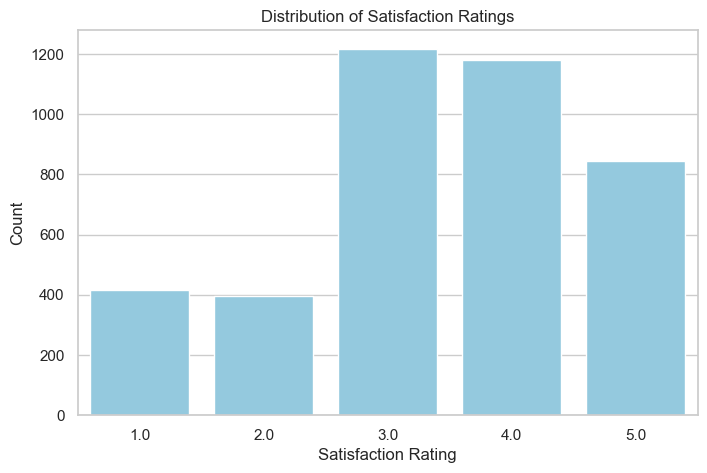

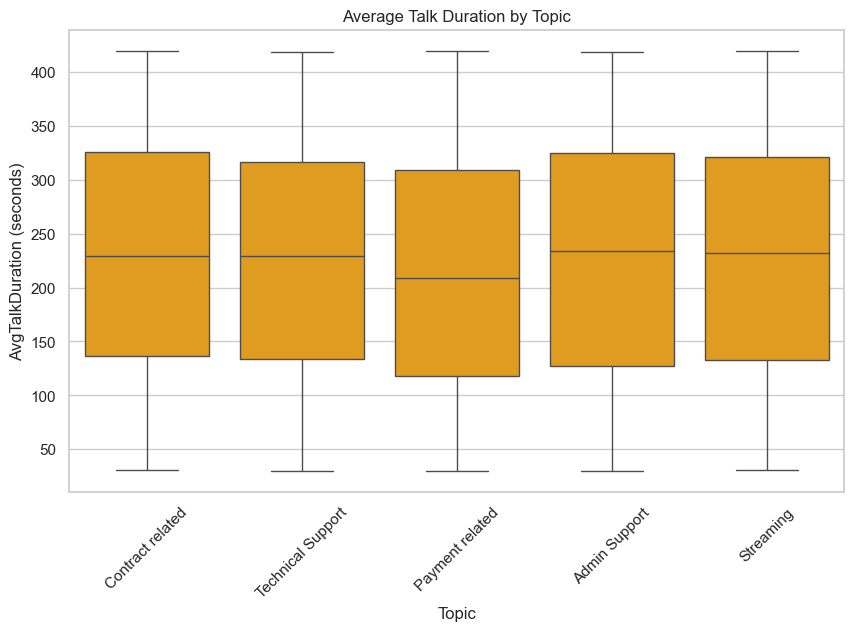

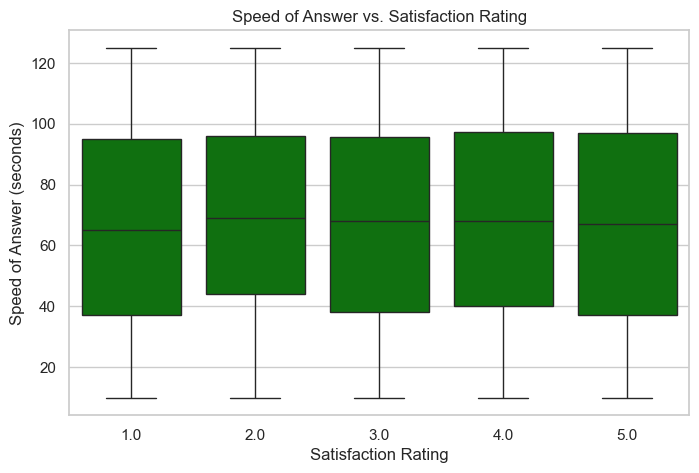

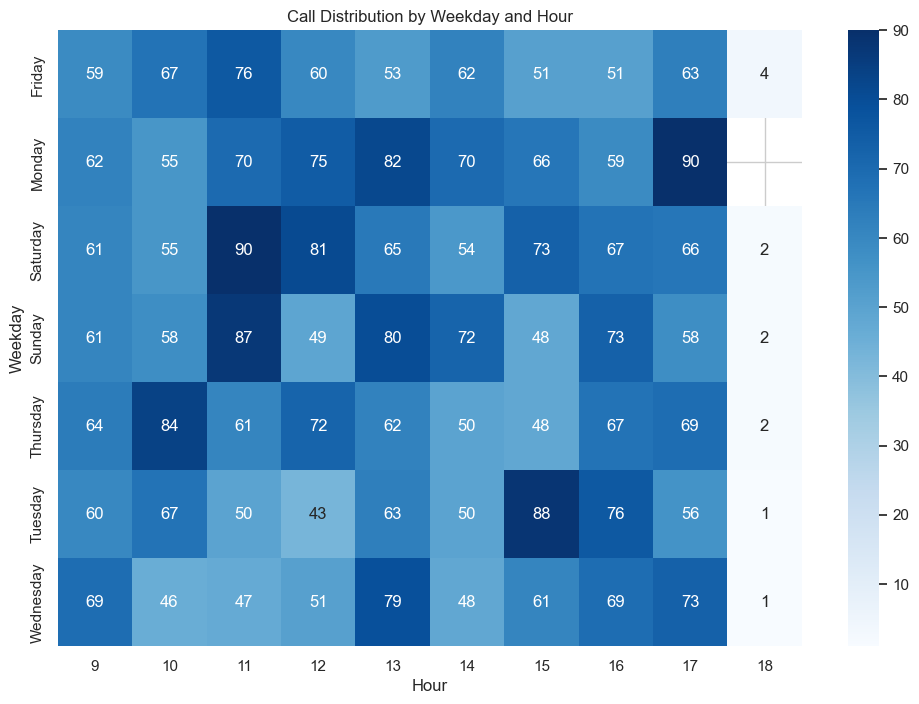

/var/folders/h_/qhhn80fj7czdnbmq_53_3wj80000gn/T/ipykernel_28910/2747336672.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agent_performance.index, y=agent_performance.values, palette="viridis")


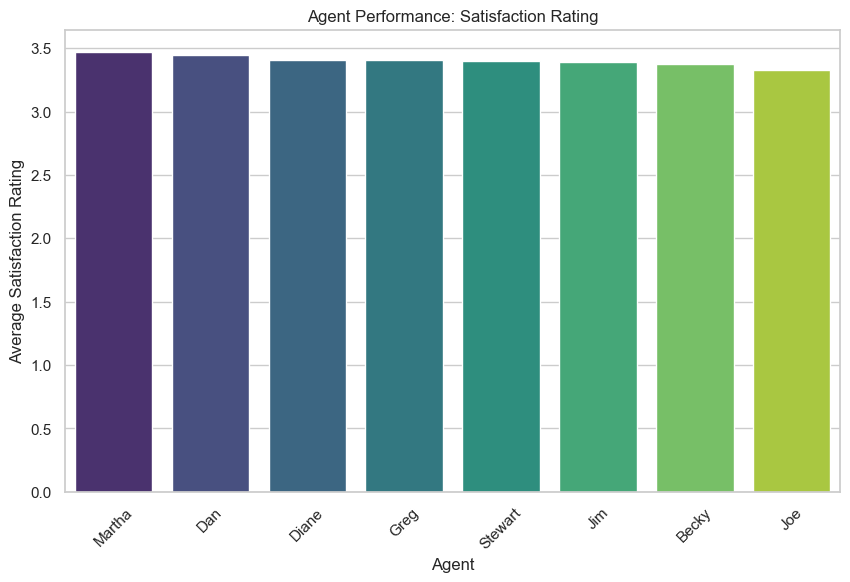

/var/folders/h_/qhhn80fj7czdnbmq_53_3wj80000gn/T/ipykernel_28910/2747336672.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resolution_rate.index, y=resolution_rate.values, palette="coolwarm")


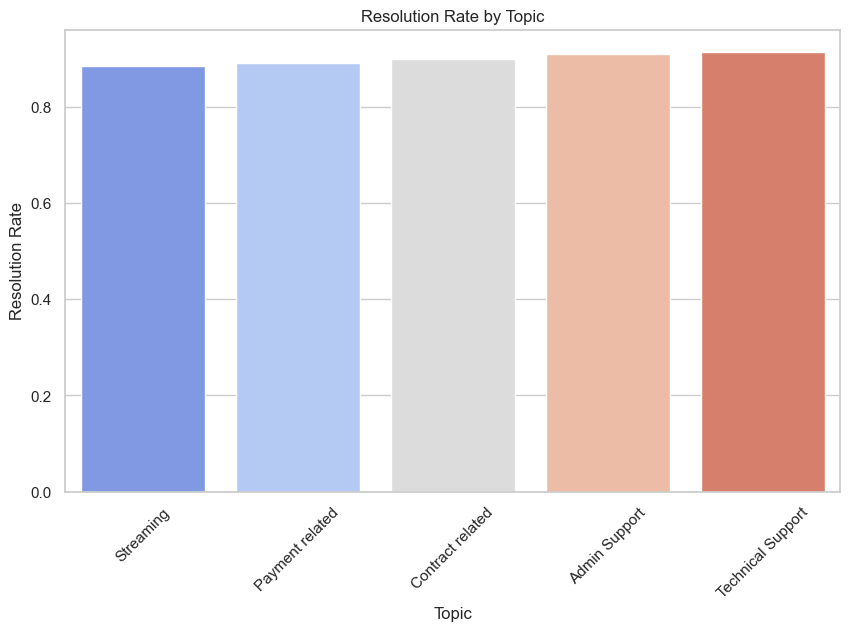

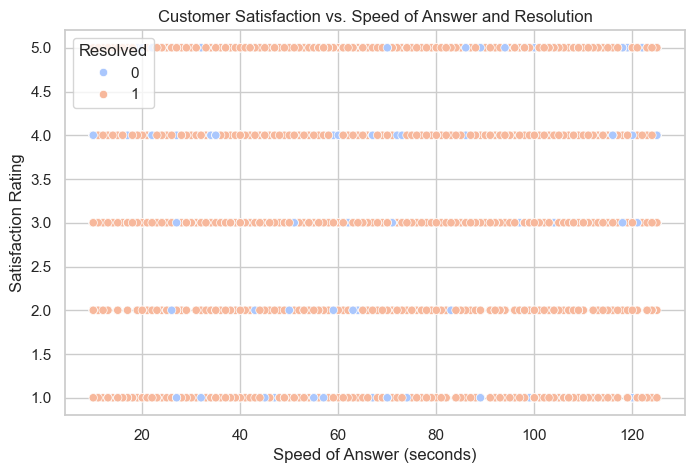

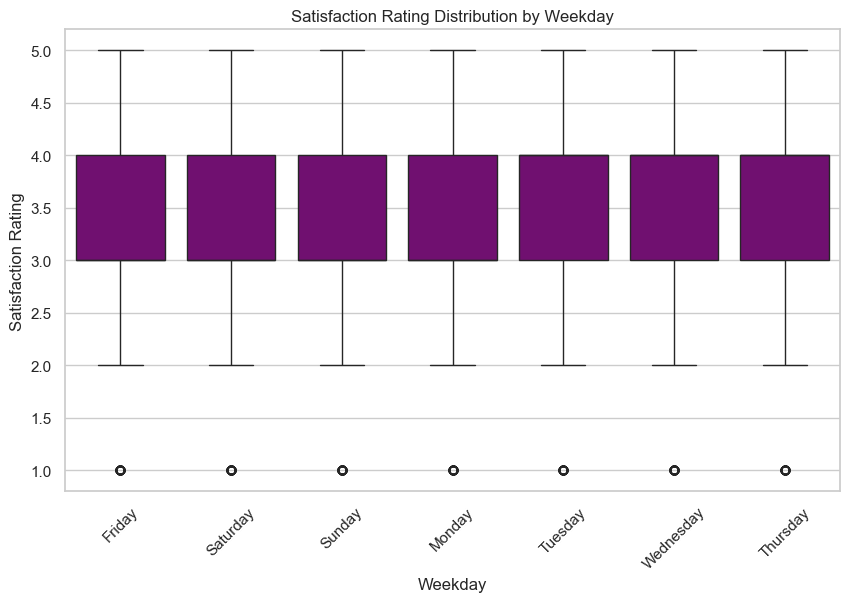

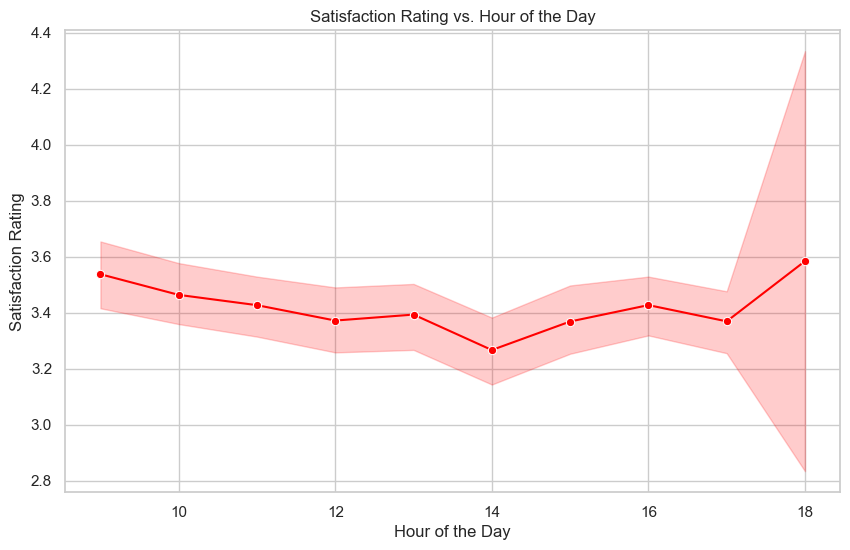

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Satisfaction Rating Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Satisfaction rating', data=data, color="skyblue")
plt.title('Distribution of Satisfaction Ratings')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Count')
plt.show()

# 2. Average Talk Duration by Topic
plt.figure(figsize=(10, 6))
sns.boxplot(x='Topic', y='AvgTalkDuration', data=data, color="orange")
plt.title('Average Talk Duration by Topic')
plt.xlabel('Topic')
plt.ylabel('AvgTalkDuration (seconds)')
plt.xticks(rotation=45)
plt.show()

# 3. Speed of Answer vs. Satisfaction Rating
plt.figure(figsize=(8, 5))
sns.boxplot(x='Satisfaction rating', y='Speed of answer in seconds', data=data, color="green")
plt.title('Speed of Answer vs. Satisfaction Rating')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Speed of Answer (seconds)')
plt.show()

# 4. Call Distribution by Weekday and Hour (Heatmap)
plt.figure(figsize=(12, 8))
call_heatmap = data.groupby(['Weekday', 'Hour']).size().unstack()
sns.heatmap(call_heatmap, cmap='Blues', annot=True, fmt=".0f")
plt.title('Call Distribution by Weekday and Hour')
plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.show()

# 5. Agent Performance Analysis
agent_performance = data.groupby('Agent')['Satisfaction rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=agent_performance.index, y=agent_performance.values, palette="viridis")
plt.title('Agent Performance: Satisfaction Rating')
plt.xlabel('Agent')
plt.ylabel('Average Satisfaction Rating')
plt.xticks(rotation=45)
plt.show()

# 6. Topics with Low Resolutions (Barplot)
resolution_rate = data.groupby('Topic')['Resolved'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=resolution_rate.index, y=resolution_rate.values, palette="coolwarm")
plt.title('Resolution Rate by Topic')
plt.xlabel('Topic')
plt.ylabel('Resolution Rate')
plt.xticks(rotation=45)
plt.show()

# 7. Customer Pain Points: Scatterplot (Speed of Answer vs Satisfaction)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Speed of answer in seconds', y='Satisfaction rating', data=data, hue='Resolved', palette="coolwarm")
plt.title('Customer Satisfaction vs. Speed of Answer and Resolution')
plt.xlabel('Speed of Answer (seconds)')
plt.ylabel('Satisfaction Rating')
plt.legend(title='Resolved', loc='upper left')
plt.show()

# 8. Satisfaction Rating Distribution by Weekday
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weekday', y='Satisfaction rating', data=data, color="purple")
plt.title('Satisfaction Rating Distribution by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Satisfaction Rating')
plt.xticks(rotation=45)
plt.show()

# 9. Satisfaction Rating vs. Hour of the Day
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='Satisfaction rating', data=data, marker='o', color='red')
plt.title('Satisfaction Rating vs. Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Satisfaction Rating')
plt.show()
